# Correlation between BSS trips and COVID-19

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')

## Import and prepare covid data

In [21]:
data_folder = '../../data/'
covid_data = pd.read_csv(data_folder + 'covid/treated_data/data.csv')
covid_data

,date,new_cases_ma,new_deaths_ma
0,2020-03-06,2.0,NaN
1,2020-03-07,2.0,NaN
2,2020-03-08,3.0,NaN
3,2020-03-09,3.0,NaN
4,2020-03-10,4.0,NaN
...,...,...,...
889,2022-08-12,21952.0,214.0
890,2022-08-13,19565.0,188.0
891,2022-08-14,18537.0,180.0
892,2022-08-15,20351.0,199.0


In [22]:
from modules.DataPreparation import DataPreparation
dp = DataPreparation()

In [23]:
covid_data = dp.transform_to_datetime(covid_data, ['date'])
covid_data = dp.transform_to_time_series(covid_data, 'date', drop=True)
covid_data

,new_cases_ma,new_deaths_ma
date,,
2020-03-06,2.0,NaN
2020-03-07,2.0,NaN
2020-03-08,3.0,NaN
2020-03-09,3.0,NaN
2020-03-10,4.0,NaN
...,...,...
2022-08-12,21952.0,214.0
2022-08-13,19565.0,188.0
2022-08-14,18537.0,180.0


## Prepare trips data

In [24]:
without_outliers = False

In [25]:
if without_outliers:
    source_folder_path =  data_folder + 'trips/preprocessed/grouped/'
else:
    source_folder_path = data_folder + 'trips/preprocessed/grouped/'

destination_folder_path = data_folder + 'charts/covid/'

In [26]:
trips = pd.read_csv(source_folder_path + 'trips_grouped_by_day_mean.csv')
trips

,date,number_of_trips,tripduration,start_station_id,end_station_id,age,hour,week_day,weekend,holiday
0,2018-01-26,1,114.000000,NaN,NaN,NaN,15.000000,4.0,False,False
1,2018-01-27,8,2263.250000,19.750000,18.500000,NaN,14.250000,5.0,True,False
2,2018-01-28,12,2344.272727,28.416667,26.166667,NaN,14.833333,6.0,True,False
3,2018-01-29,8,5821.875000,13.142857,7.857143,NaN,15.500000,0.0,False,False
4,2018-01-30,69,1325.582090,11.014493,10.985507,NaN,16.144928,1.0,False,False
...,...,...,...,...,...,...,...,...,...,...
1551,2022-04-26,7014,2498.257995,145.471913,148.455350,31.908143,13.606929,1.0,False,False
1552,2022-04-27,7322,2514.078922,142.672767,145.502118,31.709845,13.571019,2.0,False,False
1553,2022-04-28,7192,2661.764657,147.507786,149.033394,31.698189,13.484705,3.0,False,False
1554,2022-04-29,5707,3163.509735,144.782898,143.025947,31.182616,13.171894,4.0,False,False


In [27]:
from modules.DataPreparation import DataPreparation
dp = DataPreparation()

In [28]:
trips = dp.transform_to_datetime(trips, ['date'])

In [29]:
trips = dp.transform_to_time_series(trips, 'date', drop = True)

In [30]:
trips

,number_of_trips,tripduration,start_station_id,end_station_id,age,hour,week_day,weekend,holiday
date,,,,,,,,,
2018-01-26,1,114.000000,NaN,NaN,NaN,15.000000,4.0,False,False
2018-01-27,8,2263.250000,19.750000,18.500000,NaN,14.250000,5.0,True,False
2018-01-28,12,2344.272727,28.416667,26.166667,NaN,14.833333,6.0,True,False
2018-01-29,8,5821.875000,13.142857,7.857143,NaN,15.500000,0.0,False,False
2018-01-30,69,1325.582090,11.014493,10.985507,NaN,16.144928,1.0,False,False
...,...,...,...,...,...,...,...,...,...
2022-04-26,7014,2498.257995,145.471913,148.455350,31.908143,13.606929,1.0,False,False
2022-04-27,7322,2514.078922,142.672767,145.502118,31.709845,13.571019,2.0,False,False
2022-04-28,7192,2661.764657,147.507786,149.033394,31.698189,13.484705,3.0,False,False


## Merge COVID and trip data

In [31]:
trips_and_covid = pd.merge(trips, covid_data, left_index=True, right_index=True, how = 'left')
trips_and_covid

,number_of_trips,tripduration,start_station_id,end_station_id,age,hour,week_day,weekend,holiday,new_cases_ma,new_deaths_ma
date,,,,,,,,,,,
2018-01-26,1,114.000000,NaN,NaN,NaN,15.000000,4.0,False,False,NaN,NaN
2018-01-27,8,2263.250000,19.750000,18.500000,NaN,14.250000,5.0,True,False,NaN,NaN
2018-01-28,12,2344.272727,28.416667,26.166667,NaN,14.833333,6.0,True,False,NaN,NaN
2018-01-29,8,5821.875000,13.142857,7.857143,NaN,15.500000,0.0,False,False,NaN,NaN
2018-01-30,69,1325.582090,11.014493,10.985507,NaN,16.144928,1.0,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-26,7014,2498.257995,145.471913,148.455350,31.908143,13.606929,1.0,False,False,14692.0,102.0
2022-04-27,7322,2514.078922,142.672767,145.502118,31.709845,13.571019,2.0,False,False,12434.0,99.0
2022-04-28,7192,2661.764657,147.507786,149.033394,31.698189,13.484705,3.0,False,False,12613.0,102.0


In [32]:
trips_and_covid['age'].first_valid_index()

Timestamp('2020-01-01 00:00:00')

## Correlation

In [33]:
def plot_all_correlations(data):
    # get the data correlation matrix
    corr = data.corr()
    plt.figure(figsize=(9, 7))
    plt.imshow(corr.abs(), cmap='Blues', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr)), corr.columns)
    plt.suptitle('Absolute Correlation between variables', fontsize=15, fontweight='bold')
    plt.grid(False)
    plt.show()
    return corr

def plot_target_variable_correlation(data, corr, target_variable):
    correlation = np.array(corr[target_variable])
    # remove correlation with itself
    correlation = np.delete(correlation, np.where(correlation == 1))
    columns = np.array(data.keys())
    columns =  np.delete(columns, np.where(columns == target_variable))
    plt.figure(figsize=(15, 7))
    plt.bar(columns, abs(correlation))
    plt.title("Correlation with '{variable}' variable".format(variable = target_variable))
    plt.show(True)

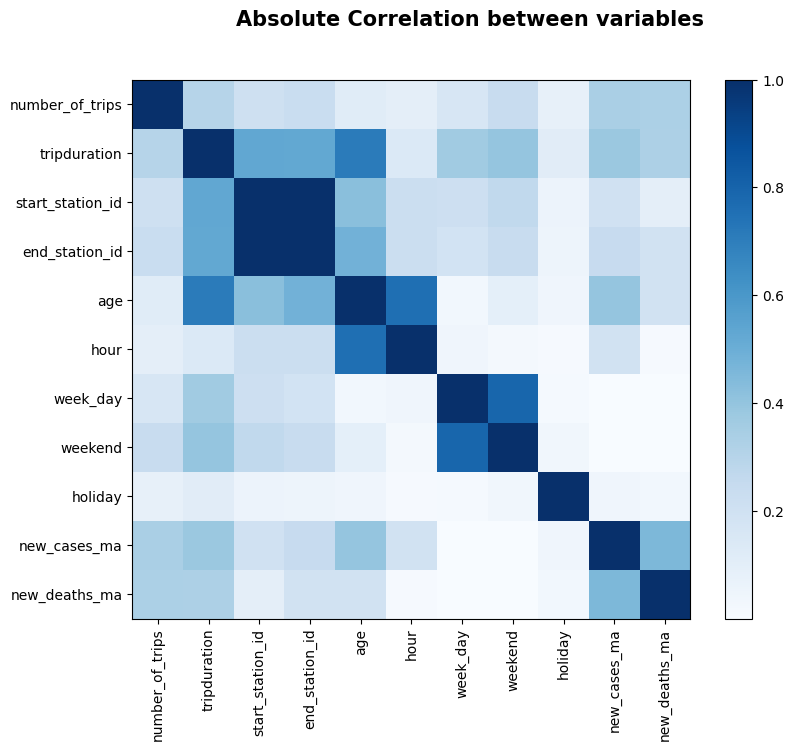

In [34]:
correlation_matrix = plot_all_correlations(trips_and_covid)

## COVID-19 cases

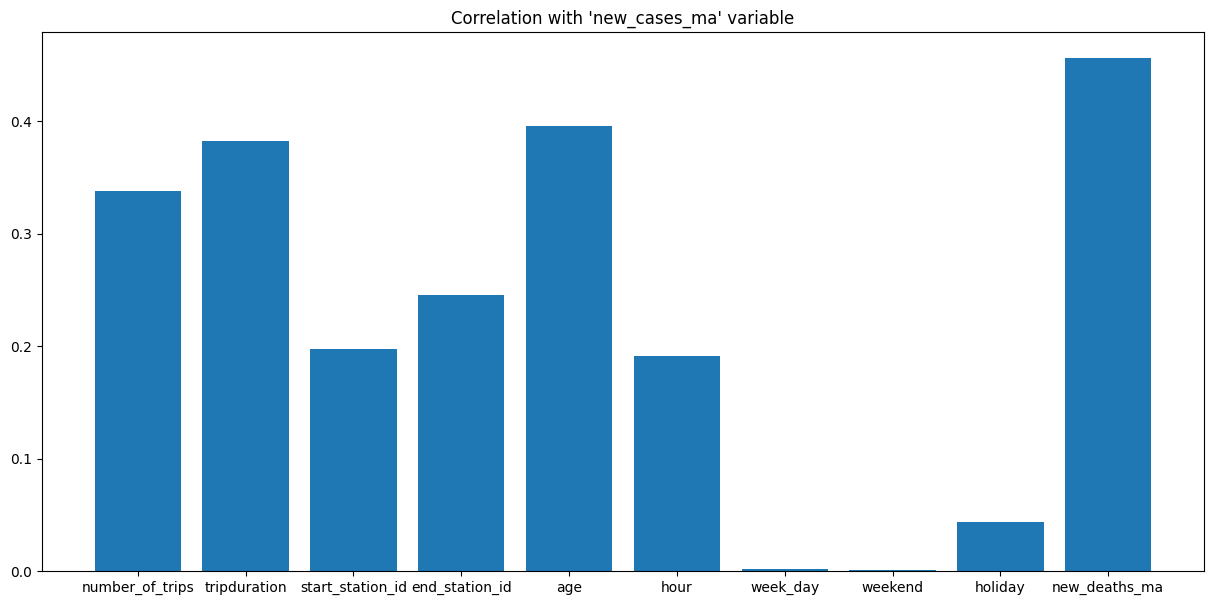

In [35]:
correlation_with_variable = plot_target_variable_correlation(trips_and_covid,
                                                             correlation_matrix, 'new_cases_ma')
correlation_with_variable

## COVID-19 deaths

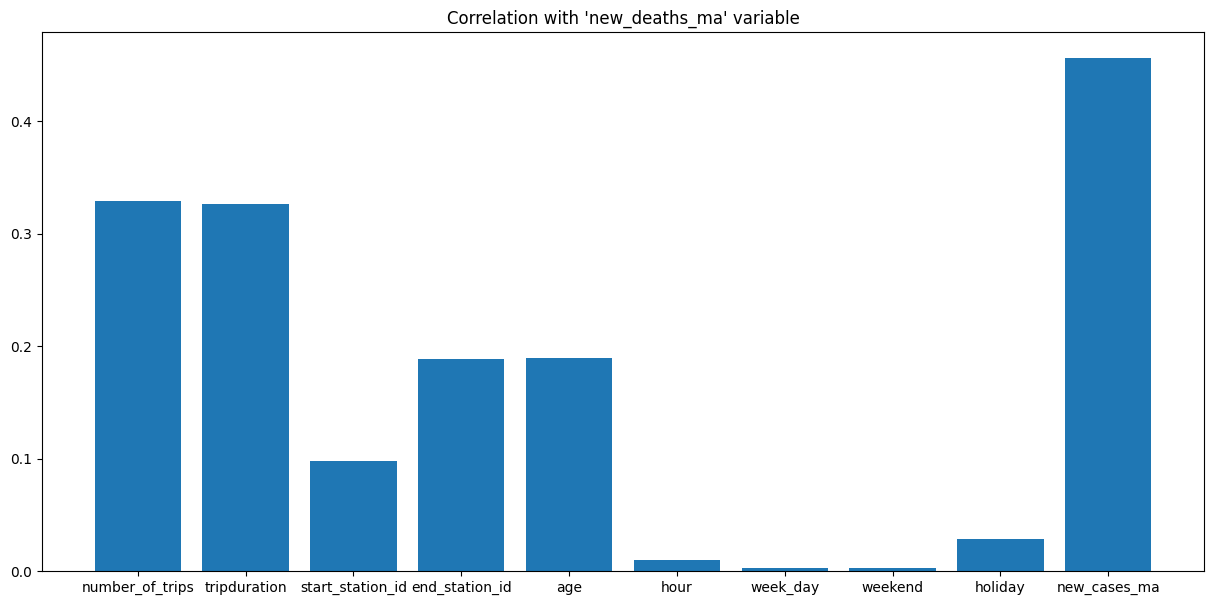

In [36]:
correlation_with_variable = plot_target_variable_correlation(trips_and_covid,
                                                                correlation_matrix, 'new_deaths_ma')
correlation_with_variable

### Plot together

In [37]:
def plot_variable_and_covid_together(variable, covid_variable):
    trips_and_covid_plot = trips_and_covid.filter([variable, covid_variable])
    trips_and_covid_plot.plot(secondary_y = covid_variable)

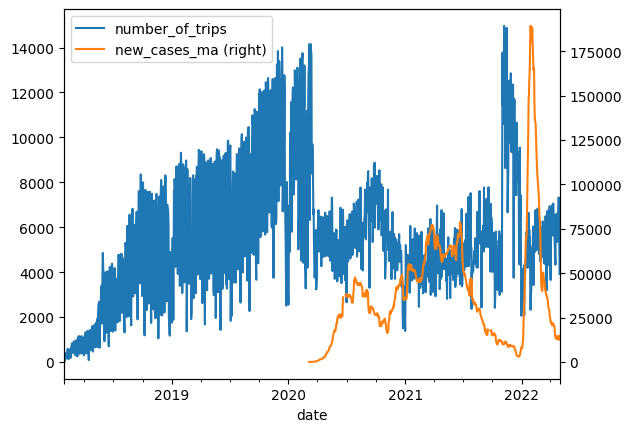

In [38]:
variable = 'number_of_trips'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

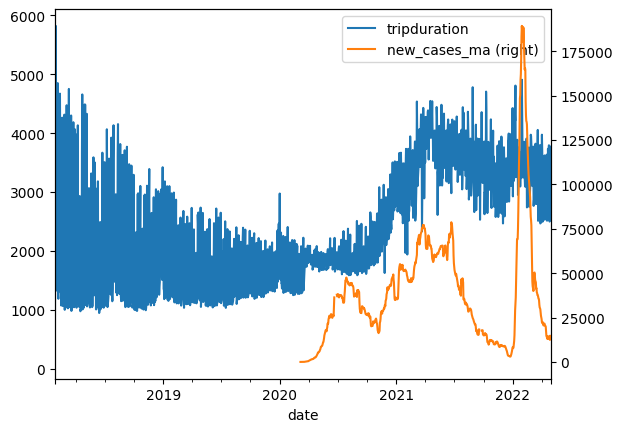

In [39]:
variable = 'tripduration'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)

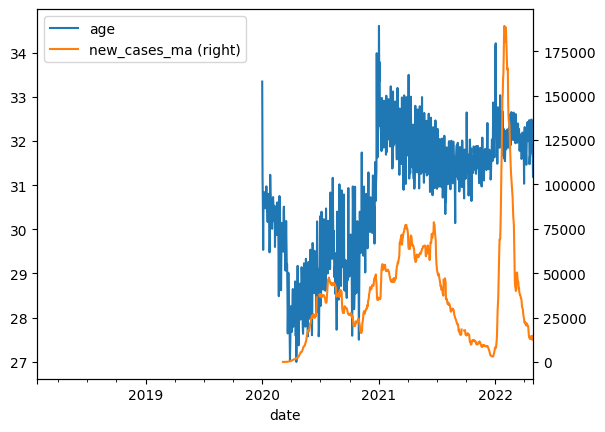

In [40]:
variable = 'age'
covid_variable = 'new_cases_ma'
plot_variable_and_covid_together(variable, covid_variable)